In [ ]:
pip install pandas numpy matplotlib yfinance

[*********************100%%**********************]  1 of 1 completed


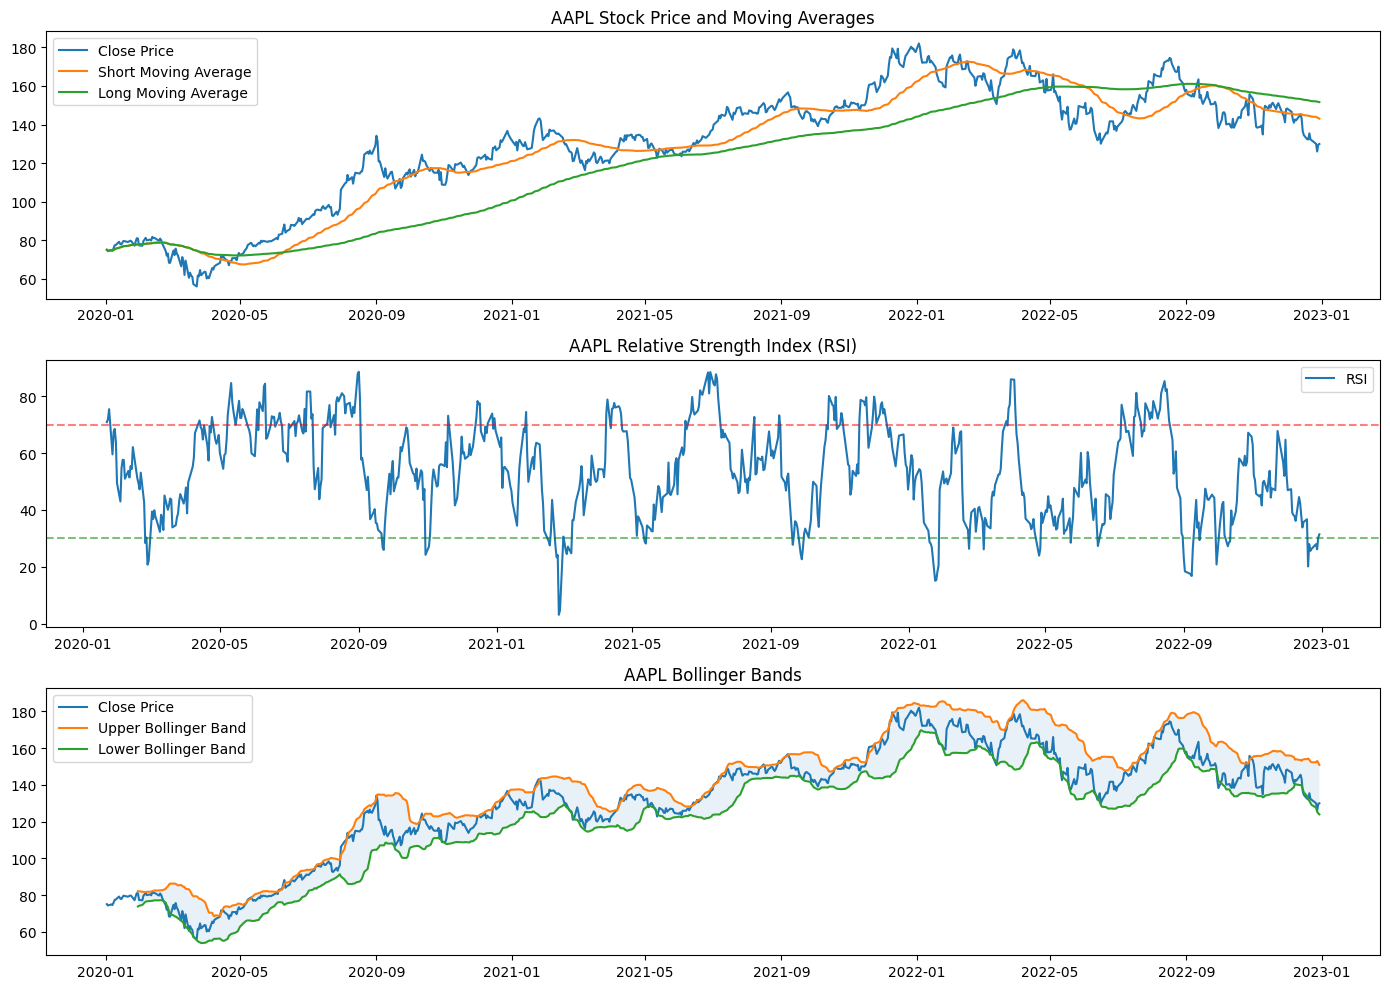

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Download stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Calculate Moving Averages
def calculate_moving_averages(data, short_window, long_window):
    data['SMA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['LMA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

# Calculate Bollinger Bands
def calculate_bollinger_bands(data, window):
    data['MA20'] = data['Close'].rolling(window=20).mean()
    data['stddev'] = data['Close'].rolling(window=20).std()
    data['UpperBand'] = data['MA20'] + (data['stddev'] * 2)
    data['LowerBand'] = data['MA20'] - (data['stddev'] * 2)
    return data

# Plot the data with technical indicators
def plot_technical_indicators(data, ticker):
    plt.figure(figsize=(14, 10))

    plt.subplot(3, 1, 1)
    plt.plot(data['Close'], label='Close Price')
    plt.plot(data['SMA'], label='Short Moving Average')
    plt.plot(data['LMA'], label='Long Moving Average')
    plt.title(f'{ticker} Stock Price and Moving Averages')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(data['RSI'], label='RSI')
    plt.axhline(70, linestyle='--', alpha=0.5, color='red')
    plt.axhline(30, linestyle='--', alpha=0.5, color='green')
    plt.title(f'{ticker} Relative Strength Index (RSI)')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(data['Close'], label='Close Price')
    plt.plot(data['UpperBand'], label='Upper Bollinger Band')
    plt.plot(data['LowerBand'], label='Lower Bollinger Band')
    plt.fill_between(data.index, data['LowerBand'], data['UpperBand'], alpha=0.1)
    plt.title(f'{ticker} Bollinger Bands')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main function to run the analysis
def main():
    ticker = 'AAPL'  # Example ticker symbol
    start_date = '2020-01-01'
    end_date = '2023-01-01'

    data = get_stock_data(ticker, start_date, end_date)
    data = calculate_moving_averages(data, short_window=50, long_window=200)
    data = calculate_rsi(data, window=14)
    data = calculate_bollinger_bands(data, window=20)

    plot_technical_indicators(data, ticker)

if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed


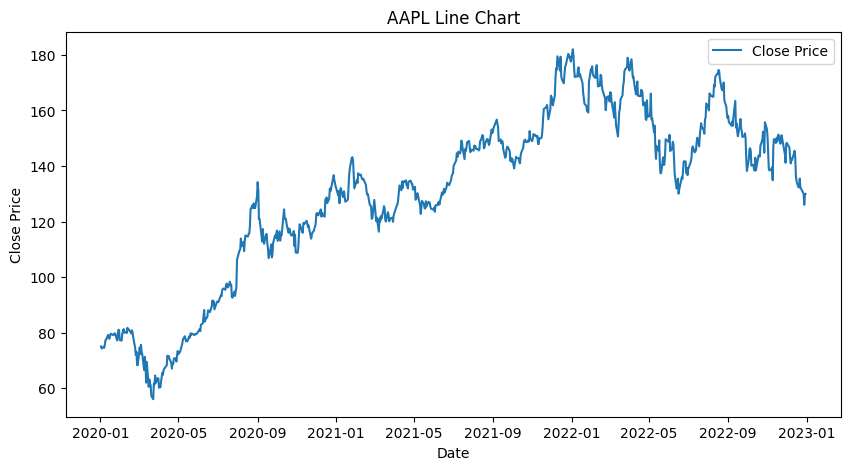

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.title(f'{ticker} Line Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


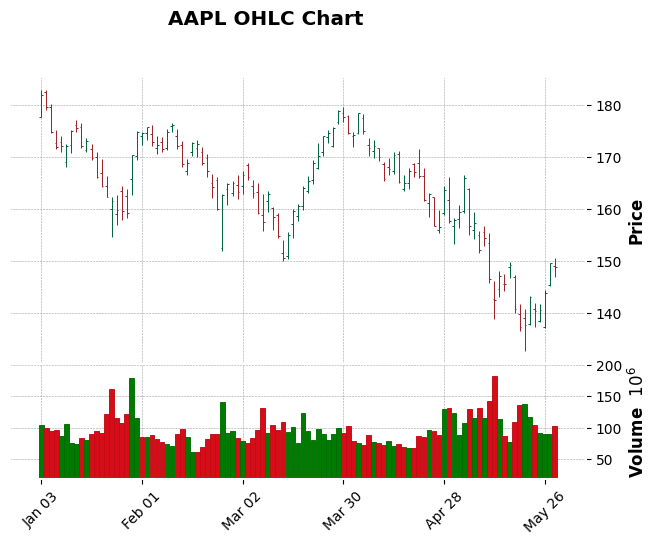

In [ ]:
import yfinance as yf
import mplfinance as mpf

# Download historical data for a small subset
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2022-06-01')

# Plot OHLC chart
mpf.plot(data, type='ohlc', title=f'{ticker} OHLC Chart', style='charles', volume=True)


[*********************100%%**********************]  1 of 1 completed


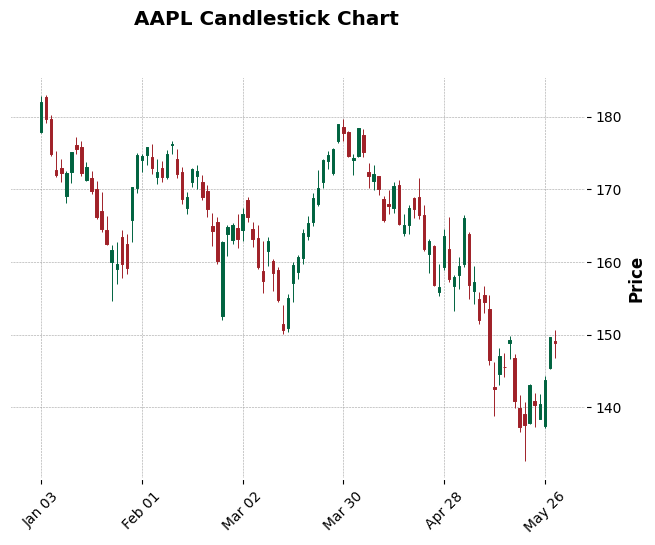

In [ ]:
import yfinance as yf
import mplfinance as mpf

# Download historical data for a small subset
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2022-06-01')

# Plot candlestick chart
mpf.plot(data, type='candle', title=f'{ticker} Candlestick Chart', style='charles')


[*********************100%%**********************]  1 of 1 completed


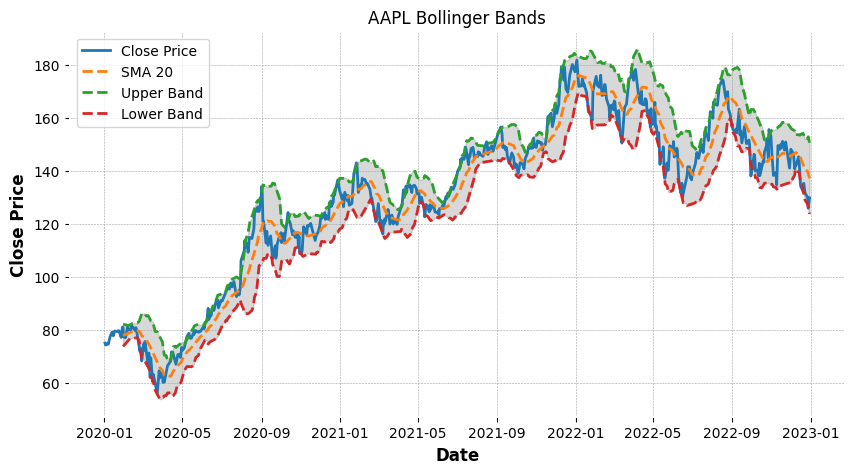

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Calculate Bollinger Bands
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['UpperBand'] = data['SMA20'] + 2*data['Close'].rolling(window=20).std()
data['LowerBand'] = data['SMA20'] - 2*data['Close'].rolling(window=20).std()

# Plot Bollinger Bands
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA20'], label='SMA 20', linestyle='--')
plt.plot(data['UpperBand'], label='Upper Band', linestyle='--')
plt.plot(data['LowerBand'], label='Lower Band', linestyle='--')
plt.fill_between(data.index, data['LowerBand'], data['UpperBand'], color='gray', alpha=0.3)
plt.title(f'{ticker} Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


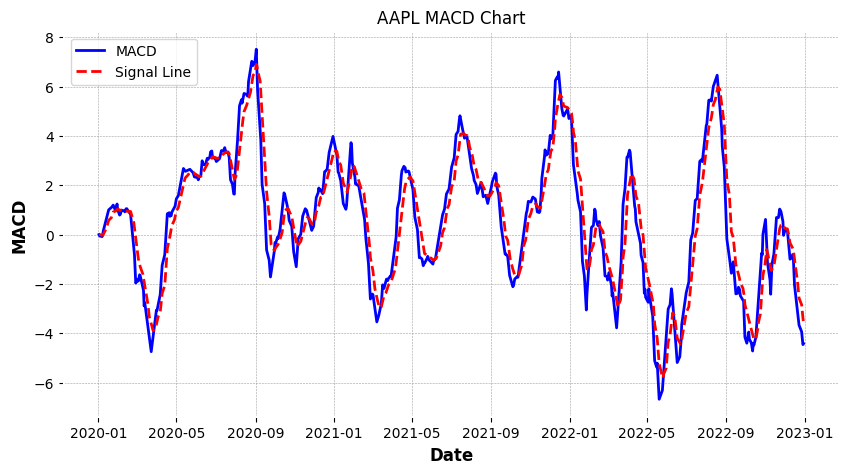

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Calculate MACD
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD
plt.figure(figsize=(10, 5))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['Signal'], label='Signal Line', color='red', linestyle='--')
plt.title(f'{ticker} MACD Chart')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


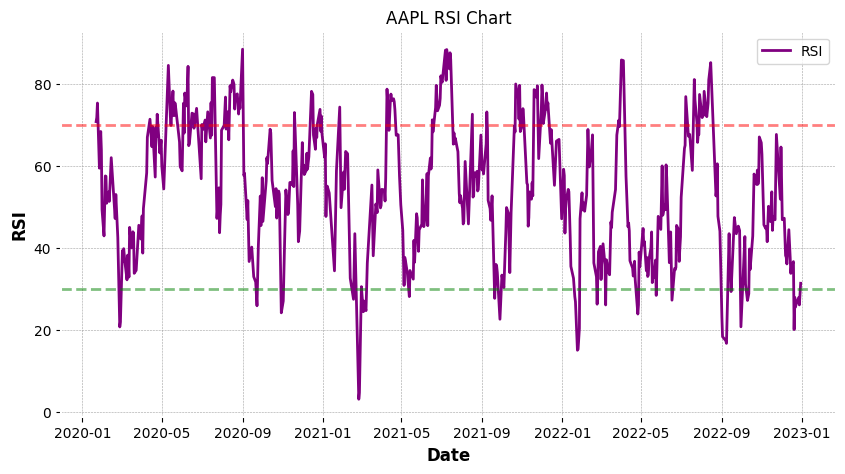

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Calculate RSI
delta = data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Plot RSI
plt.figure(figsize=(10, 5))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title(f'{ticker} RSI Chart')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()
